##Module 4 -

### Solution notebook for module 4

In [0]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




---


##Query 4.1

    -- Import the csv file of the stock which contained the Bollinger columns as well.
    Create a new column 'Call' , whose entries are - 
      - 'Buy' if the stock price is below the lower Bollinger band 
      - 'Hold Buy/ Liquidate Short' if the stock price is between the lower and middle Bollinger band 
      - 'Hold Short/ Liquidate Buy' if the stock price is between the middle and upper Bollinger band 
      - 'Short' if the stock price is above the upper Bollinger band
    
    -- Now train a classification model with the 3 bollinger columns and the stock price as inputs and 'Calls' as output. Check the accuracy on a test set. (There are many classifier models to choose from, try each one out and compare the accuracy for each)
    
    -- Import another stock data and create the bollinger columns. Using the already defined model, predict the daily calls for this new stock.

In [0]:
#imports for our notebook

import numpy as np
import pandas as pd
import sklearn

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.rcParams['figure.figsize'] = (20,8)

In [0]:
#load our data
data= pd.read_csv('drive/My Drive/LAXMIMACH.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 15 columns):
Symbol                    494 non-null object
Series                    494 non-null object
Date                      494 non-null object
Prev Close                494 non-null float64
Open Price                494 non-null float64
High Price                494 non-null float64
Low Price                 494 non-null float64
Last Price                494 non-null float64
Close Price               494 non-null float64
Average Price             494 non-null float64
Total Traded Quantity     494 non-null int64
Turnover                  494 non-null float64
No. of Trades             494 non-null int64
Deliverable Qty           494 non-null int64
% Dly Qt to Traded Qty    494 non-null float64
dtypes: float64(9), int64(3), object(3)
memory usage: 58.0+ KB


**The next task would be to add bollinger bands to this dataframe, we will add 3 bollinger bands, an upper band, a lower band and a moving average as a middle band.**

**Edit 1: I did not save bollinger values with data earlier (saved them in different file), so instead of importing that data , i'll add the column to this file as well.**

In [0]:
#the piece of code here is same as that used earlier to build bollinger bands.
band_dur= 14
no_of_std= 2

rolling_mean = data['Close Price'].rolling(window= band_dur).mean()
rolling_std = data['Close Price'].rolling(window= band_dur).std()

#middle band
data['Rolling_Avg']= rolling_mean

#upper band
data['Upper Band'] = rolling_mean + (rolling_std * no_of_std)

#lower band
data['Lower Band'] = rolling_mean - (rolling_std * no_of_std) 

In [0]:
data.describe()

,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Rolling_Avg,Upper Band,Lower Band
count,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,4.940000e+02,494.000000,494.000000,494.000000,481.000000,481.000000,481.000000
mean,6282.411640,6292.694332,6381.254251,6209.717105,6282.211437,6284.197267,6292.729899,6104.172065,3.936248e+07,1340.325911,3778.125506,63.735931,6317.113120,6643.970455,5990.255785
std,977.684756,979.732187,995.233583,956.189419,973.272163,975.321352,976.206285,7039.116612,4.608108e+07,1213.791291,4777.258890,12.650891,945.026449,1045.670005,880.583029
min,4360.350000,4336.550000,4416.000000,4316.500000,4355.000000,4360.350000,4390.880000,566.000000,3.239942e+06,218.000000,384.000000,27.610000,4536.760714,4763.803127,4112.593834
25%,5714.962500,5724.212500,5789.000000,5672.062500,5717.137500,5714.962500,5722.772500,2201.000000,1.314080e+07,591.250000,1480.750000,55.610000,5757.771429,5915.447492,5512.640787
50%,5948.675000,5967.650000,6050.000000,5875.000000,5946.000000,5948.675000,5950.125000,3954.000000,2.464435e+07,976.500000,2463.500000,64.075000,5947.617857,6210.344570,5697.370097
75%,6774.900000,6745.275000,6893.000000,6607.825000,6785.750000,6774.900000,6749.005000,6892.750000,4.496040e+07,1645.000000,4223.750000,71.877500,6880.214286,7301.552331,6249.876674
max,9249.900000,9300.000000,9383.550000,9106.000000,9236.000000,9249.900000,9282.660000,62697.000000,3.794485e+08,12808.000000,56218.000000,97.880000,8839.600000,9594.580690,8363.635360


In [0]:
missing_data= data.isnull().sum()/len(data)
missing_data= missing_data[missing_data > 0]

missing_data=missing_data.sort_values()

print(missing_data)

Rolling_Avg    0.026316
Upper Band     0.026316
Lower Band     0.026316
dtype: float64


**We can see that we added three columns but we have some missing values in these columns. So we need to handle these missing values before further operation.**

**We will remove these rows, as filling these with 0 might result in unwanted outliers.**

In [0]:
#removing all rows with NULL values in any column
data= data.dropna()

#to reset the index back to 0.
data.index -= 13

data.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            471, 472, 473, 474, 475, 476, 477, 478, 479, 480],
           dtype='int64', length=481)

**The first task is to create a new column 'call', below given code does that.**

In [0]:
data['call']= 'Call'

for i in range(0, 480):
  
  #we will use conditional statements to fill values in the new column
  if (data['Close Price'][i] < data['Lower Band'][i]):
    data['call'][i]= 'Buy'
    
  elif (data['Close Price'][i] > data['Lower Band'][i] and data['Close Price'][i] < data['Rolling_Avg'][i]):
    data['call'][i]= 'Hold Buy/ Liquidate Short'
    
  elif (data['Close Price'][i] < data['Upper Band'][i] and data['Close Price'][i] > data['Rolling_Avg'][i]):
    data['call'][i]= 'Hold Short/ Liquidate Buy'
      
  elif (data['Close Price'][i] > data['Upper Band'][i]):
    data['call'][i]= 'Short'
  
  else:
    data['call'][i]= None

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7:

**Now that we have sucessfully created the call column we can proceed further.**

In [0]:
#to check first 5 rows of dataframe.
data.head(5)

#to chek our dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 481 entries, 0 to 480
Data columns (total 19 columns):
Symbol                    481 non-null object
Series                    481 non-null object
Date                      481 non-null object
Prev Close                481 non-null float64
Open Price                481 non-null float64
High Price                481 non-null float64
Low Price                 481 non-null float64
Last Price                481 non-null float64
Close Price               481 non-null float64
Average Price             481 non-null float64
Total Traded Quantity     481 non-null int64
Turnover                  481 non-null float64
No. of Trades             481 non-null int64
Deliverable Qty           481 non-null int64
% Dly Qt to Traded Qty    481 non-null float64
Rolling_Avg               481 non-null float64
Upper Band                481 non-null float64
Lower Band                481 non-null float64
call                      481 non-null object
dtypes: floa

**The next task is to build a classification model with the 3 bollinger bands and stock price as input and call as output, to do so we would first create a new dataframe which would contain only those columns which are relevent to us for building a classification model.**

In [0]:
#data_trade is a new column with all the relevant values.
data_trade = pd.concat([data['Close Price'], data['Rolling_Avg'], data['Lower Band'], data['Upper Band'], data['call']], axis=1)
data_trade.columns = ['Price', 'Rolling Avg', 'Lower Band', 'Upper Band', 'call']

**Now that we have created the new dataframe, we would extract our features and label from it, and seperate it in training and testing set.**




In [0]:
data_trade.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 481 entries, 0 to 480
Data columns (total 5 columns):
Price          481 non-null float64
Rolling Avg    481 non-null float64
Lower Band     481 non-null float64
Upper Band     481 non-null float64
call           481 non-null object
dtypes: float64(4), object(1)
memory usage: 42.5+ KB


In [0]:
#features for our model.
X = data_trade.iloc[:, 0: 4].values

#our label
y = data_trade.iloc[:, 4: 5].values

#just to check
print("The features are -- \n {0}\n\nThe labels are -- \n {1}".format(data_trade.iloc[:, 0: 4].head(), data_trade.iloc[:, 4:5].head()))

The features are -- 
      Price  Rolling Avg   Lower Band   Upper Band
0  4755.70  4536.760714  4309.718302  4763.803127
1  4952.05  4560.903571  4244.256178  4877.550964
2  5076.90  4595.696429  4175.318277  5016.074580
3  5059.35  4625.846429  4137.567052  5114.125806
4  5047.95  4661.810714  4127.368527  5196.252901

The labels are -- 
                         call
0  Hold Short/ Liquidate Buy
1                      Short
2                      Short
3  Hold Short/ Liquidate Buy
4  Hold Short/ Liquidate Buy


**We can see that we have our features and labels, now we can build a model.**

In [0]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [0]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

# Fitting naive bayse to the Training set
from sklearn.naive_bayes import GaussianNB
classifier_gauss = GaussianNB()
classifier_gauss.fit(X_train, y_train)

# Fitting support vector classification to the Training set
from sklearn.svm import SVC
classifier_svc = SVC(kernel='linear', random_state=0)
classifier_svc.fit(X_train, y_train)

# Fitting decision tree to Training set
from sklearn.tree import DecisionTreeClassifier
classifier_tree= DecisionTreeClassifier(random_state=0, max_depth=2)
classifier_tree.fit(X_train, y_train)

# Fitting random forest to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
classifier_rf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
# Predicting the Test set result for logistic regression
print("The test accuracy for logistic regression is {}".format(classifier.score(X_test, y_test) * 100))

# Predicting the Test set result for naive bayes
print("The test accuracy for naive bayes is {}".format(classifier_gauss.score(X_test, y_test) * 100))

# Predicting the Test set result for support vector machine
print("The test accuracy for support vector classification is {}".format(classifier_svc.score(X_test, y_test) * 100))

# Predicting the Test set result for decision tree
print("The test accuracy for decision tree classifier is {}".format(classifier_tree.score(X_test, y_test) * 100))

# Predicting the Test set result for random forest
print("The test accuracy for random forest classifier is {}".format(classifier_rf.score(X_test, y_test) * 100))


The test accuracy for logistic regression is 88.42975206611571
The test accuracy for naive bayes is 47.93388429752066
The test accuracy for support vector classification is 99.17355371900827
The test accuracy for decision tree classifier is 51.2396694214876
The test accuracy for random forest classifier is 77.68595041322314


**We can see that we are getting the most accuracy on test set for support vector machine, 99% accuracy, thus we can say that support vector classifier is the optimal model here.**

**To understand the mislabelling between classes, we can plot confusion matrices for each of the classifier as well.**

Text(616.9200000000001, 0.5, 'predicted label')

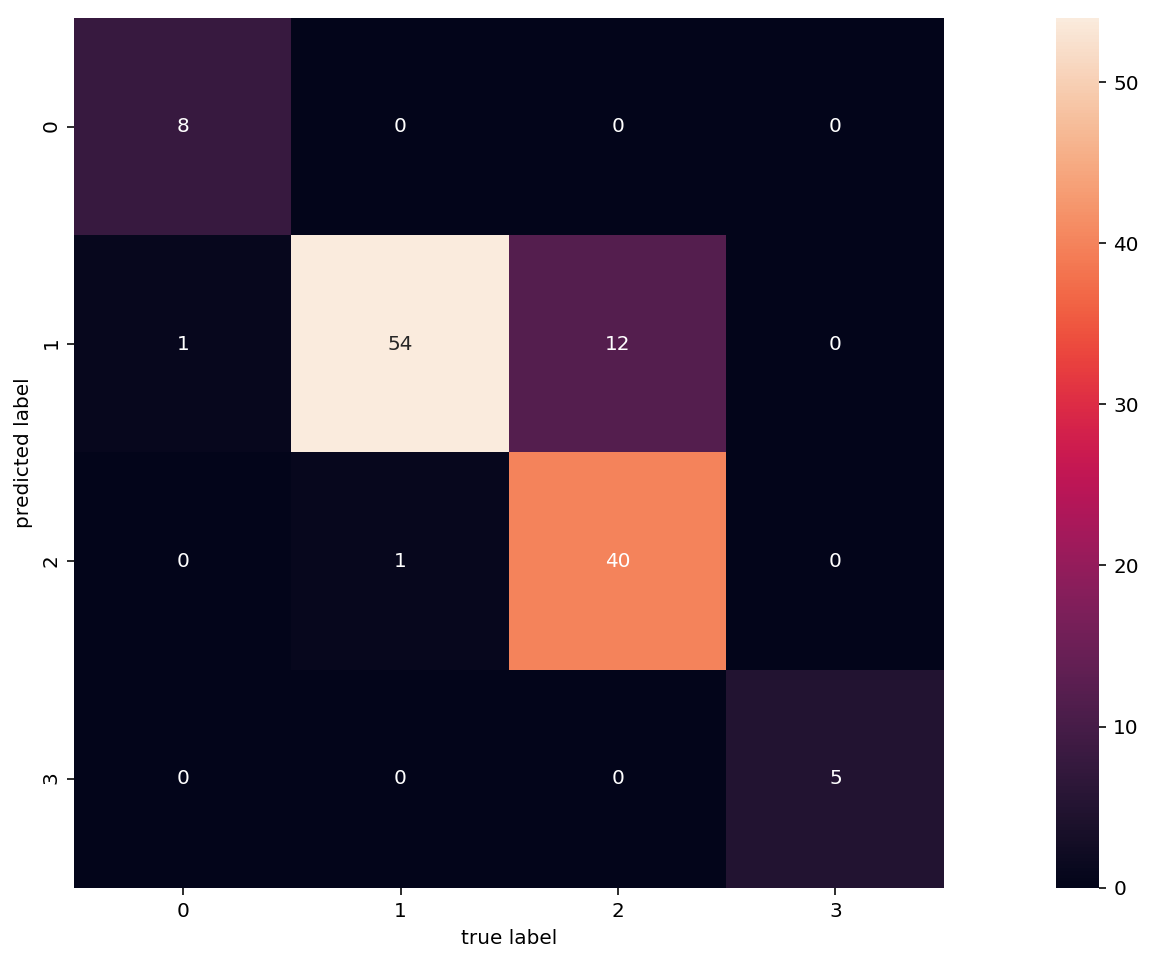

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, classifier.predict(X_test))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True)
plt.xlabel('true label')
plt.ylabel('predicted label')

Text(616.9200000000001, 0.5, 'predicted label')

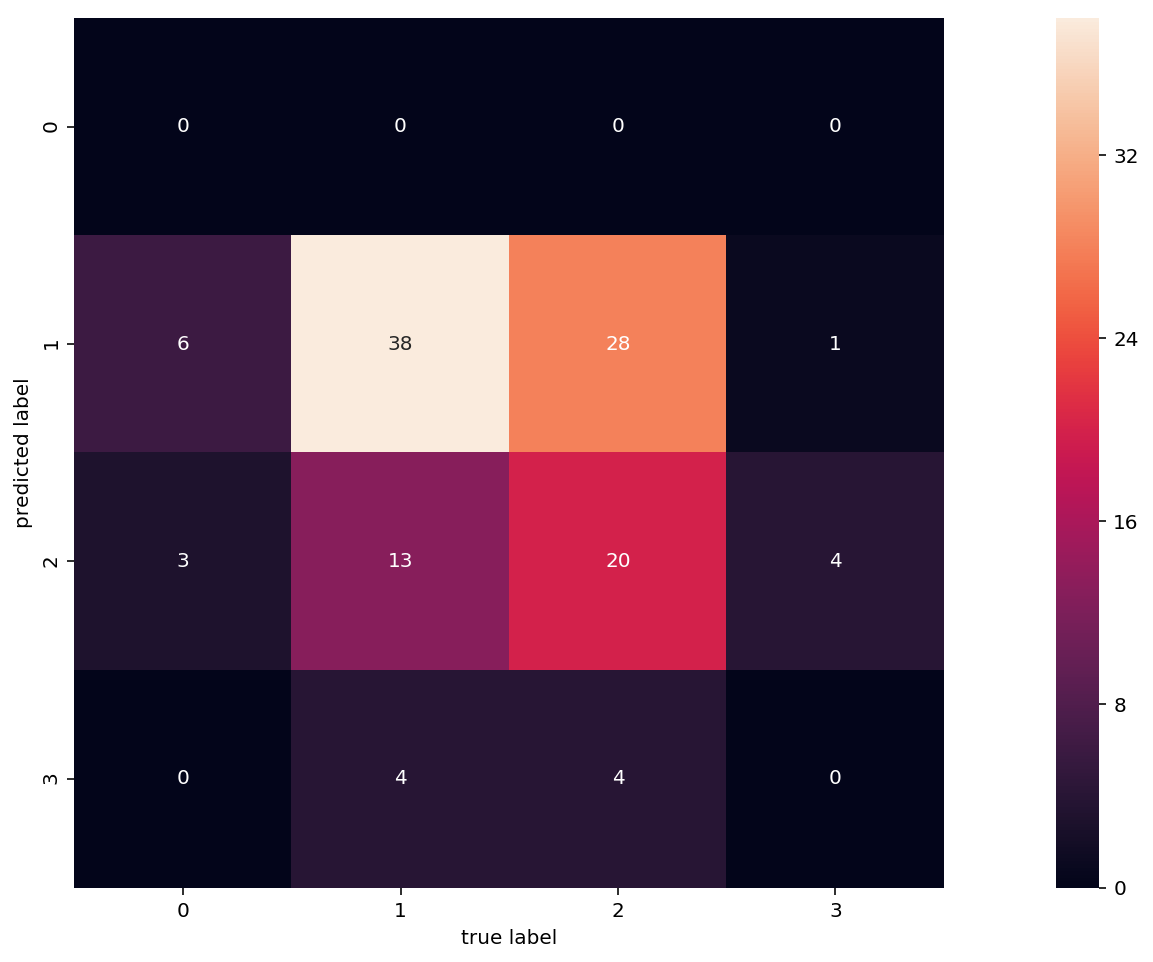

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, classifier_gauss.predict(X_test))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True)
plt.xlabel('true label')
plt.ylabel('predicted label')

Text(616.9200000000001, 0.5, 'predicted label')

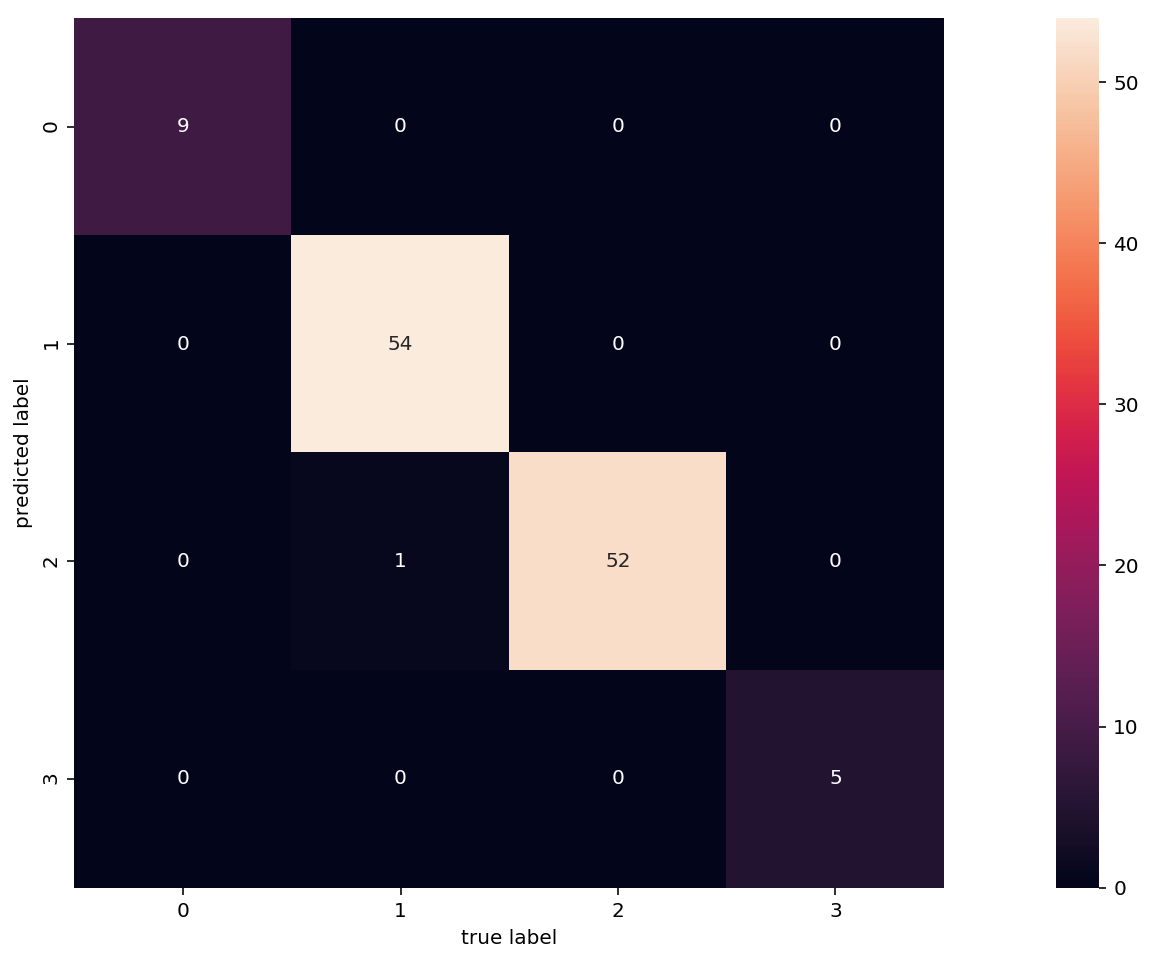

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, classifier_svc.predict(X_test))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True)
plt.xlabel('true label')
plt.ylabel('predicted label')

Text(616.9200000000001, 0.5, 'predicted label')

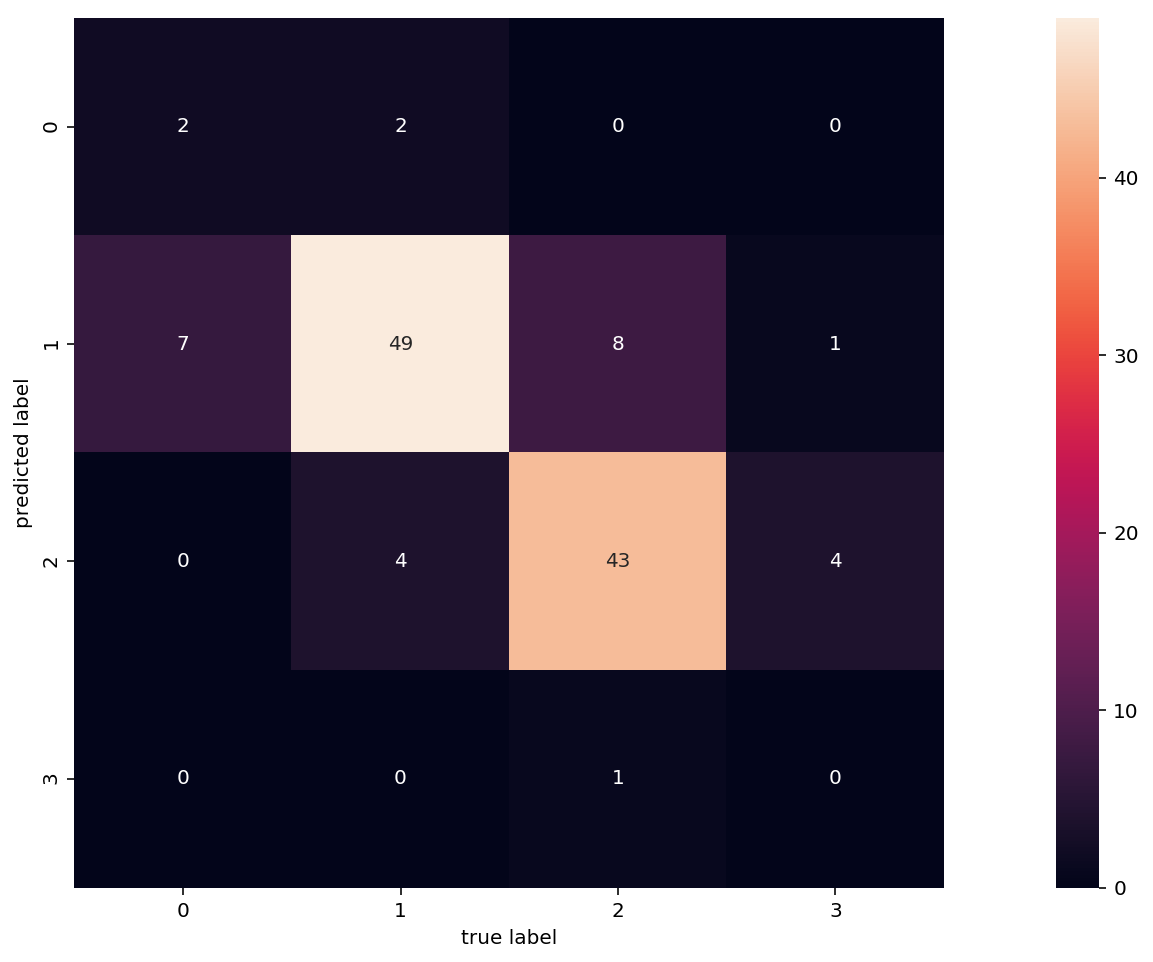

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, classifier_rf.predict(X_test))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True)
plt.xlabel('true label')
plt.ylabel('predicted label')

**We can see that support vector classifier infact had the least number of mislabelling, only 1. Thus we can say it is the best performing classifier on our data, and thus we will use this classifier to predict the call for our next data, which is also our next task.**

In [0]:
#importing a new data
data_raymond= pd.read_csv('drive/My Drive/RAYMOND.csv')
data_raymond.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,RAYMOND,EQ,15-May-2017,763.45,765.00,779.00,757.05,773.9,772.80,770.09,292498,2.252491e+08,9033,55467,18.96
1,RAYMOND,EQ,16-May-2017,772.80,773.45,801.45,768.10,783.5,785.00,788.89,823956,6.500070e+08,18238,179377,21.77
2,RAYMOND,EQ,17-May-2017,785.00,786.00,804.95,778.40,785.5,783.65,792.72,598094,4.741212e+08,13968,127637,21.34
3,RAYMOND,EQ,18-May-2017,783.65,779.35,779.95,740.20,744.0,746.95,762.57,319834,2.438956e+08,7713,92200,28.83
4,RAYMOND,EQ,19-May-2017,746.95,748.00,767.50,714.00,722.0,723.10,740.30,561346,4.155619e+08,13328,137648,24.52


**Once our new data is imported the next task would be to generate bollinger bands for it.**

In [0]:
band_dur= 14
no_of_std= 2

rolling_mean = data_raymond['Close Price'].rolling(window= band_dur).mean()
rolling_std = data_raymond['Close Price'].rolling(window= band_dur).std()

data_raymond['Rolling_Avg']= rolling_mean

data_raymond['Upper Band'] = rolling_mean + (rolling_std * no_of_std)
data_raymond['Lower Band'] = rolling_mean - (rolling_std * no_of_std) 

In [0]:
#drop all the null values
data_raymond= data_raymond.dropna()

#reset the index to 0
data_raymond.index -= 13

#create a new column named call
data_raymond['call']= None

**We will create a new dataframe with only necessary columns.**

In [0]:
data_trade_raymond = pd.concat([data_raymond['Close Price'], data_raymond['Rolling_Avg'], 
                                data_raymond['Lower Band'], data_raymond['Upper Band'], data_raymond['call']], axis=1)

data_trade_raymond.columns = ['Price', 'Rolling Avg', 'Lower Band', 'Upper Band', 'call']

In [0]:
data_trade_raymond.head()

,Price,Rolling Avg,Lower Band,Upper Band,call
0,693.90,719.125000,640.975166,797.274834,None
1,702.65,714.114286,642.028958,786.199614,None
2,751.25,711.703571,648.067896,775.339247,None
3,728.45,707.760714,658.000115,757.521313,None
4,729.05,706.482143,660.265502,752.698783,None


In [0]:
#features for our model.
X = data_trade_raymond.iloc[:, 0: 4].values

#our label
y = data_trade_raymond.iloc[:, 4:5].values

#just to check
print("The features are -- \n {0}\n\nThe labels are -- \n {1}".format(data_trade_raymond.iloc[:, 0: 4].head(), data_trade_raymond.iloc[:, 4:5].head()))

The features are -- 
     Price  Rolling Avg  Lower Band  Upper Band
0  693.90   719.125000  640.975166  797.274834
1  702.65   714.114286  642.028958  786.199614
2  751.25   711.703571  648.067896  775.339247
3  728.45   707.760714  658.000115  757.521313
4  729.05   706.482143  660.265502  752.698783

The labels are -- 
    call
0  None
1  None
2  None
3  None
4  None


In [0]:
#we would use SVC to predict the call
y= classifier_svc.predict(X)

data_trade_raymond['call']= y

In [0]:
data_trade_raymond['call'].unique()

array(['Hold Buy/ Liquidate Short', 'Hold Short/ Liquidate Buy', 'Buy',
       'Short', 'Call'], dtype=object)



---


##Query 4.2 
    
    Now, we'll again utilize classification to make a trade call, and measure the efficiency of our trading algorithm over the past two years. For this assignment , we will use RandomForest classifier.
    
    -- Import the stock data file of your choice
       Define 4 new columns , whose values are: 
        - % change between Open and Close price for the day 
        - % change between Low and High price for the day 
        - 5 day rolling mean of the day to day % change in Close Price 
        - 5 day rolling std of the day to day % change in Close Price

    -- Create a new column 'Action' whose values are: 
        - 1 if next day's price(Close) is greater than present day's. 
        - (-1) if next day's price(Close) is less than present day's. 
                        i.e. Action [ i ] = 1 if Close[ i+1 ] > Close[ i ] 
                        i.e. Action [ i ] = (-1) if Close[ i+1 ] < Close[ i ]

    -- Construct a classification model with the 4 new inputs and 'Action' as target

    -- Check the accuracy of this model , also , plot the net cumulative returns (in %) if we were to follow this algorithmic model

**We will create the four new columns with the code given below.**

In [0]:
data['%change open-close']= (((data['Close Price'] - data['Open Price']) / data['Open Price']) * 100 ).fillna(0)
data['%change high-low']= (((data['High Price'] - data['Low Price']) / data['Low Price']) * 100 ).fillna(0)

data['%Rolling Mean Close'] = data['Close Price'].rolling(window = 5).mean()
data['%Rolling Std Close']  = data['Close Price'].rolling(window  = 5).std()

**A new column action will be added to the dataframe.**

**NOTE : Instead of using 'Close Price' for previous day, we will be using 'Prev Close' for a given day, both contain the same values.**

In [0]:
data['Action']= 0

for i in range(0, 480):
  if (data['Close Price'][i] > data['Prev Close'][i]):
    data['Action'][i]= 1
  
  elif (data['Close Price'][i] < data['Prev Close'][i]):
    data['Action'][i]= -1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


**We have sucessfully filled the column Action with appropriate values, the next step would be to check for missing values, and cleaning our data before treating it against a classifier.**

In [0]:
missing_data= data.isnull().sum()/len(data)
missing_data= missing_data[missing_data > 0]

missing_data=missing_data.sort_values()

print(missing_data)

%Rolling Mean Close    0.008316
%Rolling Std Close     0.008316
dtype: float64


In [0]:
#to tdrop the null values
data= data.dropna()

#to reset the index to 0
data.index -= 4

data.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            467, 468, 469, 470, 471, 472, 473, 474, 475, 476],
           dtype='int64', length=477)

In [0]:
data.head(2)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Rolling_Avg,Upper Band,Lower Band,call,%change open-close,%change high-low,%Rolling Mean Close,%Rolling Std Close,Action
0,LAXMIMACH,EQ,07-Jun-2017,5059.35,5015.00,5120.0,5015.0,5070.00,5047.95,5060.19,3363,1.701741e+07,912,1987,59.08,4661.810714,5196.252901,4127.368527,Hold Short/ Liquidate Buy,0.657029,2.093719,4978.39,133.587019,-1
1,LAXMIMACH,EQ,08-Jun-2017,5047.95,5077.95,5312.0,5035.0,5175.85,5192.55,5218.37,20188,1.053484e+08,3871,7306,36.19,4709.657143,5306.720452,4112.593834,Hold Short/ Liquidate Buy,2.256816,5.501490,5065.76,85.860427,1


**We would create a new dataframe with only relevant colums to build our classifier, as mentined in the query it will be a rando forest classifier.**

In [0]:
# input for model
X= data.iloc[:, 19: 23].values

#label 
y= data.iloc[:, 23: ].values

#just to check
print("The features are -- \n {0}\n\nThe labels are -- \n {1}".format(data.iloc[:, 19: 23].head(), data.iloc[:, 23:].head()))

The features are -- 
    %change open-close  ...  %Rolling Std Close
0            0.657029  ...          133.587019
1            2.256816  ...           85.860427
2            1.610592  ...          102.539733
3           -2.081285  ...           98.964194
4           -1.137225  ...           85.970348

[5 rows x 4 columns]

The labels are -- 
    Action
0      -1
1       1
2       1
3      -1
4       1


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

from sklearn.ensemble import RandomForestClassifier
classifier_rf2 = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
classifier_rf2.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
print('The accuracy on test data is {}'.format(classifier_rf2.score(X_test, y_test) * 100))

The accuracy on test data is 84.16666666666667


**We can see that our classifier is able to predict correctly about 84 % times the outcome for given inputs.**

**The last step is to plot out net commulative returns for the given stock for entire time period.**

In [0]:
# daily return:
data['daily_return'] = data['Close Price'].pct_change()

# calculate cumluative return
data['net_comm_returns'] = np.exp(np.log1p(data['daily_return']).cumsum()) -1 

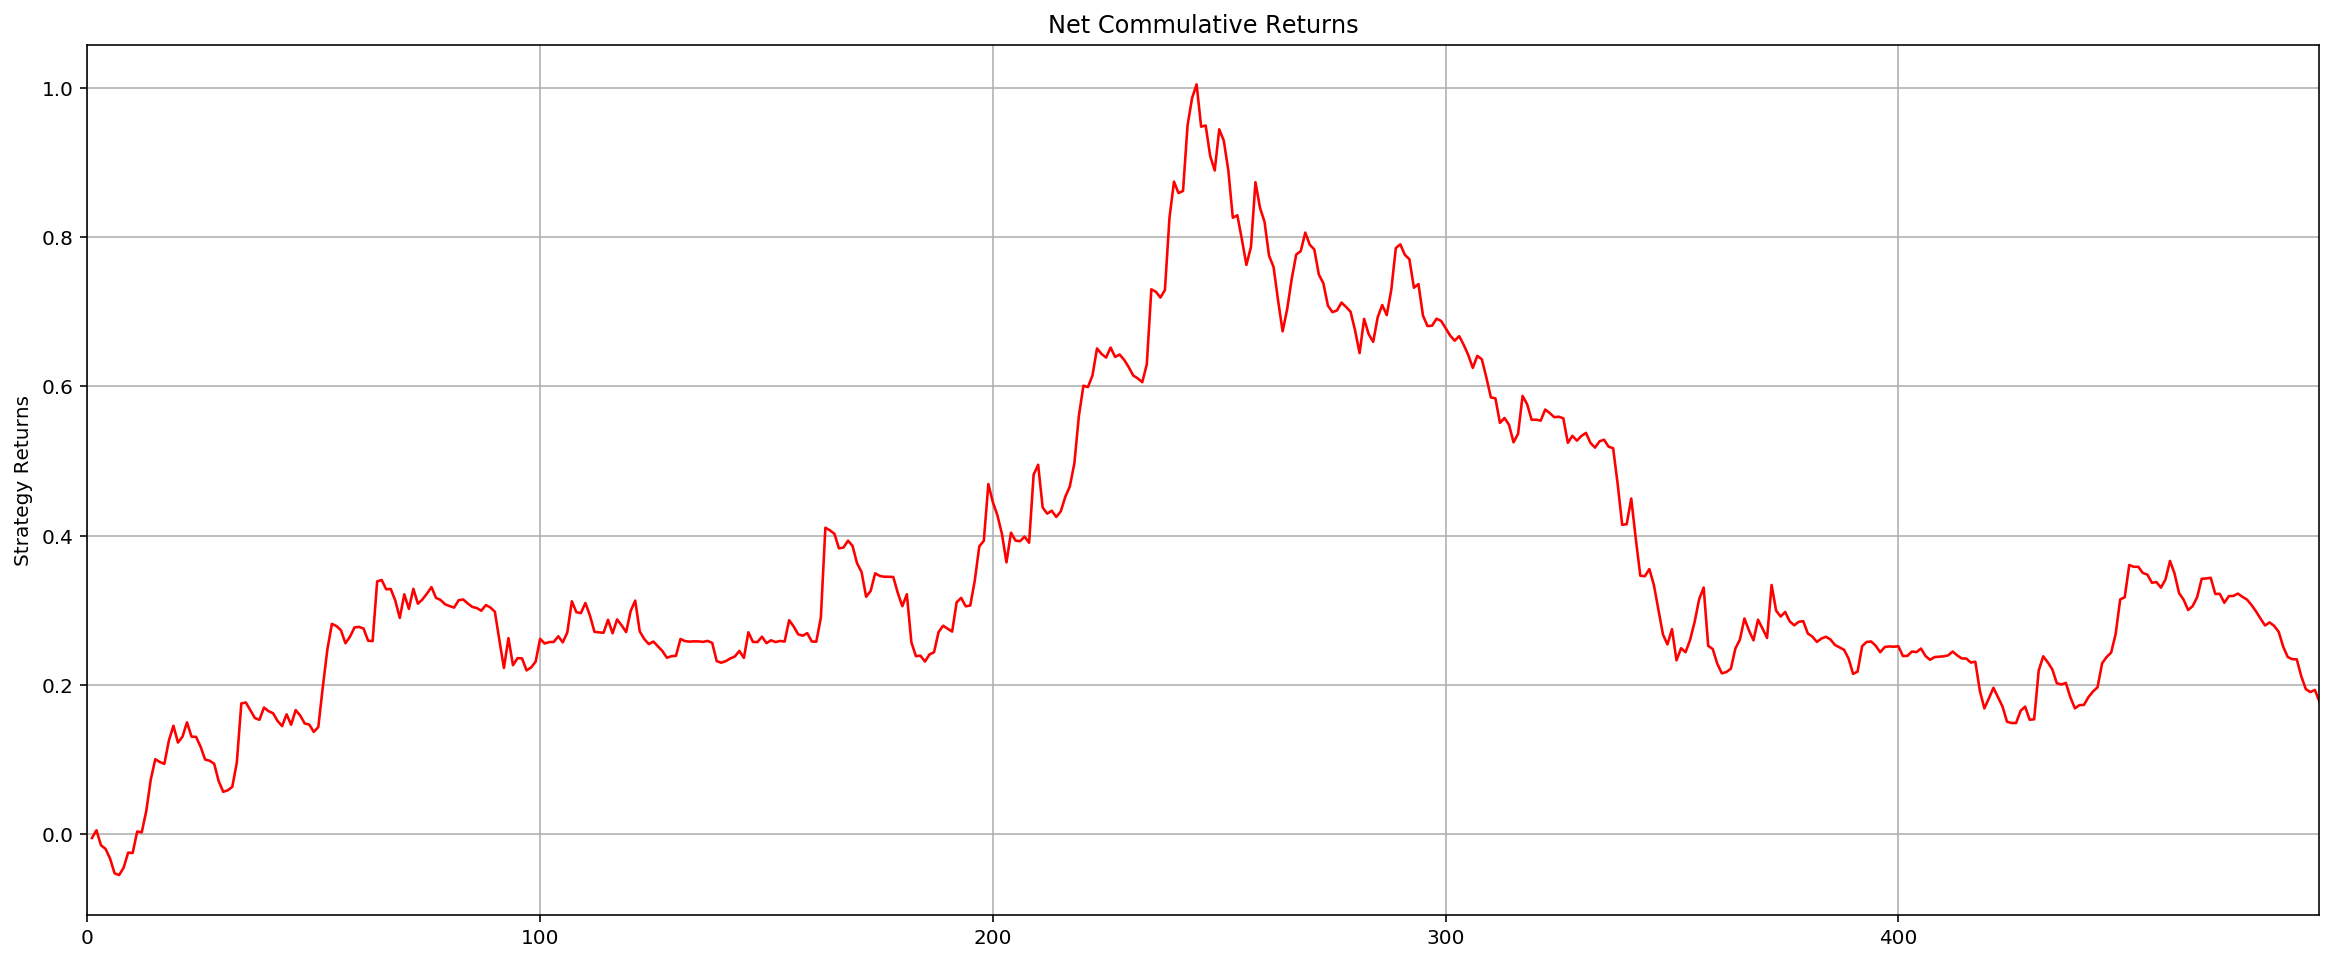

In [0]:
import matplotlib.pyplot as plt
fig = plt.figure()

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111, title='Net Commulative Returns', ylabel='Strategy Returns')
week['comm_returns'].plot(ax=ax1, color='r', lw=1.3, grid= True)